## Actividad 10

## Punto 1

In [2]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [22]:
data = X[:,0:4]

## Punto 2

### Modelo K-Means

In [23]:
from sklearn.cluster import KMeans

def run_modelo_kmeans(data, n_clusters):
    modelo_kmeans = KMeans(n_clusters=n_clusters, n_init=25, random_state=123)
    modelo_kmeans.fit(data)
    y_predict = modelo_kmeans.predict(data)
    return modelo_kmeans

In [24]:
# plot result
def grafica_kmeans(data, modelo_kmeans):
    f, axes = plt.subplots(1, 2, figsize=(11,5))
    axes[0].scatter(data[:,0], data[:,1])
    axes[1].scatter(data[:,0], data[:,1], c = modelo_kmeans.labels_, cmap='rainbow')
    axes[1].scatter(modelo_kmeans.cluster_centers_[:,0], modelo_kmeans.cluster_centers_[:,1], marker="+", s=500, c='orange')
    plt.show()

=== Modelo KMeans con 2 Clusters ===


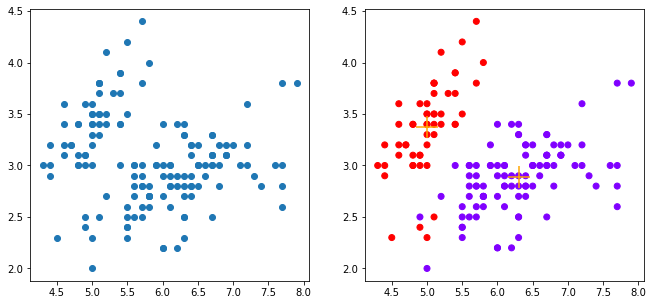

=== Fin Modelo ===

=== Modelo KMeans con 3 Clusters ===


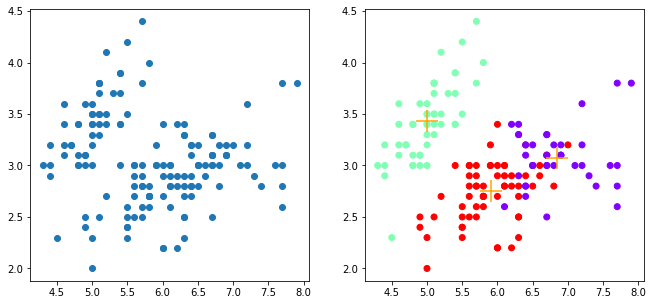

=== Fin Modelo ===

=== Modelo KMeans con 4 Clusters ===


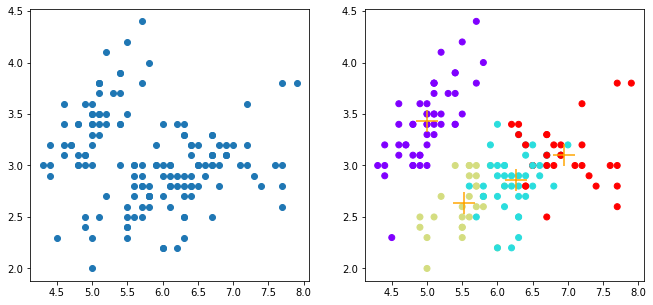

=== Fin Modelo ===

=== Modelo KMeans con 5 Clusters ===


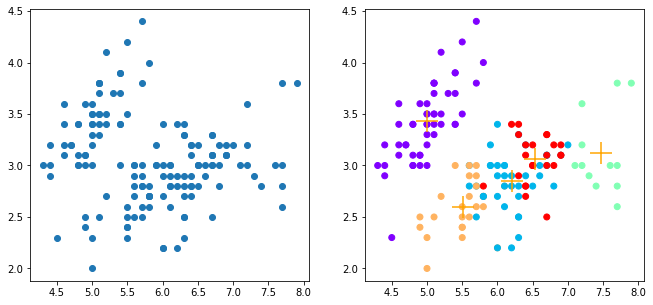

=== Fin Modelo ===



In [25]:
# generate K-means model for k {2,3,4,5}
for i in range(2,6):
    print(f"=== Modelo KMeans con {i} Clusters ===")
    kmeans_res = run_modelo_kmeans(data, i)
    grafica_kmeans(data, kmeans_res)
    print("=== Fin Modelo ===\n")

## Punto 3

### Dendograma (Agrupamiento Jerárquico )

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [27]:
linked_complete = linkage(data, 'complete')

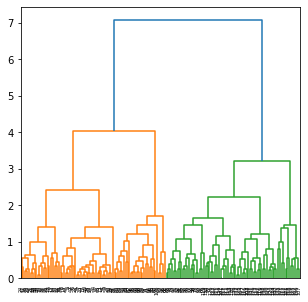

In [28]:
plt.figure(figsize=(5, 5))
dendrogram(linked_complete,
  orientation='top',
    distance_sort='descending',
    show_leaf_counts=True)
plt.show()

### Cálculo del índice silhouette

In [29]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [30]:
rg_de_grupos= range(2,10)
val_silhouette = []

In [31]:
for numero_clusters in rg_de_grupos:
    modelo = AgglomerativeClustering(
           affinity = 'euclidean',
           linkage = 'complete',
           n_clusters = numero_clusters)

    etiquetas_cluster = modelo.fit_predict(data)
    silhouette_avg = silhouette_score(data, etiquetas_cluster)
    val_silhouette.append(silhouette_avg)

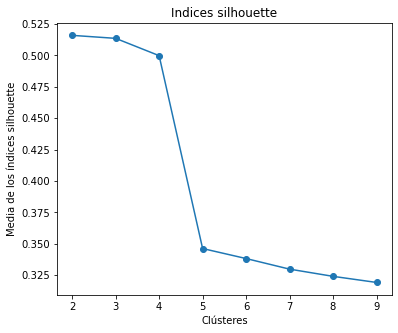

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
ax.plot(rg_de_grupos, val_silhouette, marker='o')
ax.set_title("Indices silhouette")
ax.set_xlabel('Clústeres')
ax.set_ylabel('Media de los índices silhouette');

## Punto 4

## Modelo C-Means Difuso

In [33]:
pip install fuzzy-c-means

Note: you may need to restart the kernel to use updated packages.


In [34]:
from fcmeans import FCM

In [35]:
#Creacion del modelo defieniendo los clusteres iniciales
fcm = FCM(n_clusters=3)
#entrenamiento del modelo
fcm.fit(data)

In [36]:
#obtencion de los centroides y ejecucion de las predicciones
fcm_centers = fcm.centers
fcm_labels = fcm.predict(data)

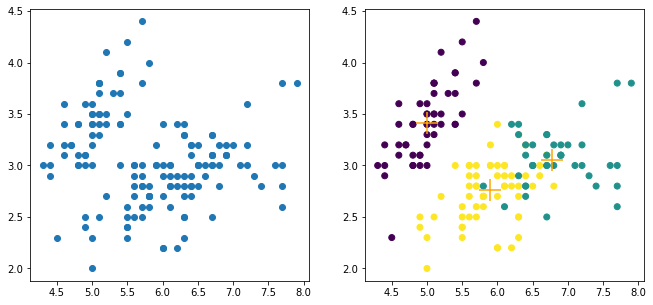

In [40]:
# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(data[:,0], data[:,1])
axes[1].scatter(data[:,0], data[:,1], c=fcm_labels)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='orange')
plt.show()

### Conclusion

Tanto K-means como C-means son unas muy buenas herramientas para descubrir grupos dentro de un determinado dataset, los resultados fueron bastante similares. El dendograma y el Indice silhouette nos ayuda de manera grafica a determinar cual es el numero de cluster optimo para K-mean o C-mean. 